### TIME SERIES


#### Автор: Приходько Игорь Анатольевич

##### г.Санкт-Петербург


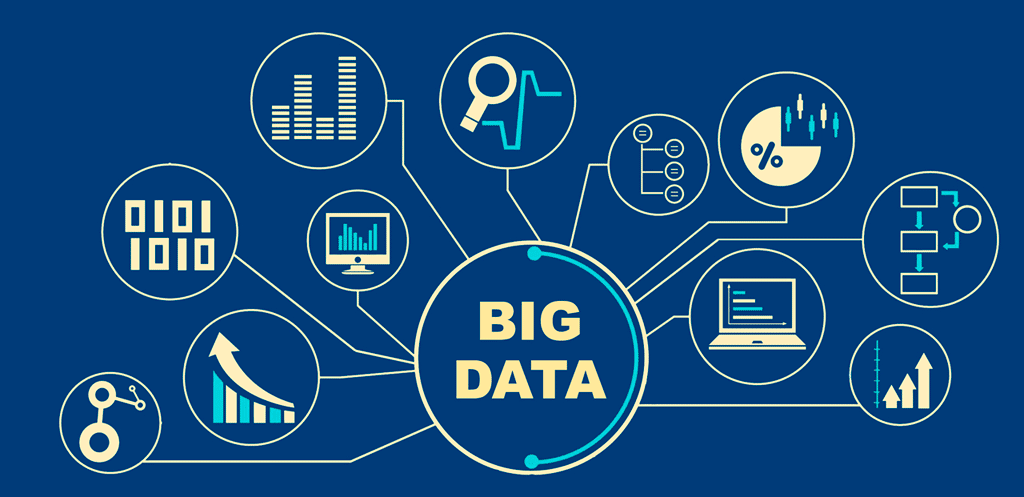

# 12 lesson

# Lesson topic: Time series. Типы данных и инструменты, относящиеся к дате и времени

# Временные ряды

Временные ряды  – важная разновидность структурированных данных.

Они встречаются во многих областях, в том числе в финансах, экономике, экологии, нейронауках и  физике. 
Любые результаты наблюдений или измерений в разные моменты времени образуют временной ряд. Для многих временных 
рядов характерна 

фиксированная частота, т.  е. интервалы между соседними точками одинаковы – 

измерения производятся, например, один раз в 15 секунд, 5 минут или в месяц. 
Но временные ряды могут быть и нерегулярными, когда интервалы времени между соседними точками различаются. 
Как разметить временной ряд и обращаться к нему, зависит от приложения. 

Существуют следующие варианты:

##### ● Временные метки

Конкретные моменты времени.

##### ● Фиксированные периоды

Например, январь 2007 или весь 2010 год.

##### ● Временные интервалы

Обозначаются метками начала и конца. Периоды можно считать частными случаями интервалов.

##### ● Время эксперимента или истекшее время

Каждая временная метка измеряет время, прошедшее с  некоторого начального момента. 
Например, результаты ежесекундного измерения диаметра печенья с момента помещения теста в духовку.

В этом курсе нас в основном будут интересовать временные ряды трех первых видов, 
хотя многие методы применимы и к экспериментальным временным рядам, 
когда индекс может содержать целые или вещественные значения, 
обозначающие время, прошедшее с  начала эксперимента. 
Простейший вид временных рядов – ряды, индексированные временной меткой.
В библиотеке pandas имеется стандартный набор инструментов и алгоритмов для работы с  временными рядами. 
Он  позволяет эффективно работать с большими рядами, легко строить продольные и поперечные срезы, 
агрегировать и производить передискретизацию регулярных и нерегулярных временных рядов. 
Как нетрудно догадаться, многие их этих инструментов особенно 
полезны в финансовых и эконометрических приложениях, но никто не мешает применять их, 
например, к анализу журналов сервера.
Как и в других главах, прежде всего импортируем NumPy и pandas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Типы данных и инструменты, относящиеся к дате и времени

В стандартной библиотеке Python имеются типы данных для представления 

даты и времени, а также средства, относящиеся к календарю. Начинать изучение надо с модулей 

#### datetime, 

#### time и 

#### calendar. 

Особенно широко используется тип datetime.datetime, или просто datetime

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2024, 11, 6, 18, 56, 49, 973709)

In [5]:
now.year, now.month, now.day

(2024, 11, 6)

##### В объекте типа datetime хранятся дата и время с точностью до микросекунды. 

##### Класс datetime.timedelta, или просто timedelta, представляет интервал времени между двумя объектами datetime:

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [8]:
delta

datetime.timedelta(days=926, seconds=56700)

In [9]:
delta.days

926

In [11]:
delta.seconds

56700

Можно прибавить (или вычесть) объект типа timedelta или его произведение 

на целое число к объекту datetime и получить в результате новый объект того же 

типа, представляющий соответственно сдвинутый момент времени:

In [12]:
from datetime import timedelta

In [13]:
start = datetime(2011, 1, 7)

In [14]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [15]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

#### Типы в модуле datetime

##### Тип   Описание

##### • date - Хранит дату (год, месяц, день) по григорианскому календарю

##### • time - Хранит время суток (часы, минуты, секунды и микросекунды)

##### • datetime - Хранит дату и время

##### • timedelta - Представляет разность между двумя значениями типа datetime (дни, секунды и микросекунды)

##### • tzinfo - Базовый тип для хранения информации о часовых поясах

### Преобразование между строкой и datetime

Объекты типа datetime и входящего в pandas типа Timestamp, с которым мы вскоре 

познакомимся, можно представить в  виде отформатированной строки с  помощью метода str или strftime, 

которому передается спецификация формата

In [16]:
stamp = datetime(2011, 1, 3)

In [17]:
str(stamp)

'2011-01-03 00:00:00'

In [20]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

### Спецификации формата даты в классе datetime (совместимо со стандартом ISO C89)

##### Спецификатор     Описание

##### %Y Год с четырьмя цифрами

##### %y Год с двумя цифрами

##### %m Номер месяца с двумя цифрами [01, 12]

##### %d Номер дня с двумя цифрами [01, 31]

##### %H Час (в 24-часовом формате) [00, 23]

##### %I Час (в 12-часовом формате) [01, 12]

##### %M Минута с двумя цифрами [01, 59]

##### %S Секунда [00, 61] (секунды 60 и 61 високосные)

##### %f Микросекунды в виде целого, дополненного слева нулями (от 000000 до 999999)

##### %j День года в виде целого, дополненного слева нулями (от 001 до 366)

##### %w День недели в виде целого числа [0 (воскресенье), 6]

##### %u День недели в виде целого числа, начинающегося с 1, где 1 соответствует понедельнику

##### %U Номер недели в году [00, 53]. Первым днем недели считается воскресенье, а дни, предшествующие первому воскресенью, 

относятся к «неделе 0»

##### %W Номер недели в году [00, 53]. Первым днем недели считается понедельник, а дни, предшествующие первому понедельнику, 

относятся к «неделе 0»

##### %z Часовой пояс UTC в виде +HHMM или –HHMM; пустая строка, если часовой пояс не учитывается

##### %F Сокращение для %Y-%m-%d, например 2012-4-18

##### %D Сокращение для %m/%d/%y, например 04/18/12

Многие из этих кодов используются для преобразования строк в даты методом 

#### datetime.strptime 

(но, например, %F так использовать нельзя):

In [21]:
value = "2011-01-03"

In [22]:
 datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [23]:
datestrs = ["7/6/2011", "8/6/2011"]

In [24]:
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

Метод datetime.strptime хорошо работает, когда формат даты известен.

Библиотека pandas, вообще говоря, ориентирована на работу с массивами 

дат, используемых как в качестве осевого индекса, так и столбца в DataFrame. Метод 

#### to_datetime 

разбирает различные представления даты. Стандартные форматы, например ISO8601, разбираются очень быстро.

In [25]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

Кроме того, этот метод умеет обрабатывать значения, которые следует считать отсутствующими (None, пустая строка и т. д.)

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isna(idx)

array([False, False,  True])

NaT (Not a Time – не время) – применяемое в pandas значение для индикации 
отсутствующей временной метки.

### Домашнее задание

### Задача 1: Создайте 2 объекта типа datetime.datetime 

### и потом получите из них 1 объект типа datetime.timedelta

In [31]:
from datetime import datetime
dt1 = datetime(2024, 11, 6)
dt2 = datetime(2020, 6, 6)
delta = dt1 - dt2
delta

datetime.timedelta(days=1614)

### Задача 2: Представьте объект типа datetime.datetime 

### в виде отформатированной строки с помощью метода datetime.str или datetime.strptime

### в формате "%m/%d/%Y"

In [36]:
from datetime import datetime
dt = datetime(2024, 11, 6)
str_ = datetime.strptime("%m/%d/%Y", dt)
str_

TypeError: strptime() argument 2 must be str, not datetime.datetime

### Задача 3: Преобразуйте список строк с датами в даты, используя метод to_datetime

["2011-1-01 09:35:00", "2024-01-5 09:35:00"]

In [33]:
import pandas as pd
dates = ["2011-1-01 09:35:00", "2024-01-5 09:35:00"]
pd_dates = pd.to_datetime(dates)
pd_dates

DatetimeIndex(['2011-01-01 09:35:00', '2024-01-05 09:35:00'], dtype='datetime64[ns]', freq=None)

# 13 lesson

# Lesson topic: Time series. Основы работы с временными рядами

Самый простой вид временного ряда в pandas – объект Series, 

индексированный временными метками, которые часто представляются внешними по отношению 

к pandas Python-строками или объектами datetime:

In [37]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
 ....: datetime(2011, 1, 7), datetime(2011, 1, 8),
 ....: datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [38]:
ts = pd.Series(np.random.standard_normal(6), index=dates)

In [39]:
ts

2011-01-02   -1.153472
2011-01-05    0.373816
2011-01-07    1.439905
2011-01-08    0.642195
2011-01-10    0.093804
2011-01-12   -0.134994
dtype: float64

In [40]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Как и для других объектов Series, арифметические операции над временными рядами 
с различными индексами автоматически приводят к выравниванию дат:

In [41]:
ts + ts[::2]

2011-01-02   -2.306944
2011-01-05         NaN
2011-01-07    2.879810
2011-01-08         NaN
2011-01-10    0.187608
2011-01-12         NaN
dtype: float64

Напомним, что конструкция ts[::2] выбирает каждый второй элемент ts.
В pandas временные метки хранятся в типе данных NumPy datetime64 с наносекундным разрешением:

In [42]:
ts.index.dtype

dtype('<M8[ns]')

Скалярные значения в  индексе DatetimeIndex  – это объекты pandas типа 
Timestamp:

In [43]:
stamp = ts.index[0]

In [44]:
stamp

Timestamp('2011-01-02 00:00:00')

Объект типа pandas.Timestamp можно использовать всюду, где допустим объект

datetime. Обратное, однако, неверно, потому что в pandas.Timestamp можно хранить 

данные с  наносекундной точностью, а  в datetime – только с  микросекундной. 

Кроме того, в pandas.Timestamp можно хранить информацию о частоте (если имеется), 

и он умеет преобразовывать часовые пояса и производить другие манипуляции. 

### Индексирование, выборка, подмножества

TimeSeries – подкласс Series и потому ведет себя точно так же по отношению 

к индексированию и выборке данных по метке:

In [45]:
stamp = ts.index[2]

In [46]:
ts[stamp]

np.float64(1.4399052236462306)

В качестве дополнительного удобства можно передать строку, допускающую интерпретацию в виде даты:

In [47]:
ts["2011-01-10"]

np.float64(0.09380399492206479)

In [49]:
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range("2000-01-01", periods=1000))

In [51]:
longer_ts

2000-01-01    1.560258
2000-01-02    0.995227
2000-01-03   -0.539553
2000-01-04   -0.753041
2000-01-05   -1.132026
                ...   
2002-09-22    1.312341
2002-09-23   -0.134987
2002-09-24    1.606992
2002-09-25   -0.595657
2002-09-26    2.041172
Freq: D, Length: 1000, dtype: float64

In [52]:
longer_ts["2001"]

2001-01-01    0.547767
2001-01-02    0.116431
2001-01-03   -1.088311
2001-01-04    0.971455
2001-01-05   -0.899013
                ...   
2001-12-27   -2.012367
2001-12-28    0.267512
2001-12-29   -0.163796
2001-12-30    0.571489
2001-12-31   -1.164310
Freq: D, Length: 365, dtype: float64

Здесь строка '2001' интерпретируется как год, и выбирается такой период
времени. Это будет работать и тогда, когда указан месяц:

In [53]:
longer_ts["2001-05"]

2001-05-01    1.424633
2001-05-02    0.707585
2001-05-03   -0.703126
2001-05-04   -0.109487
2001-05-05   -0.879303
2001-05-06   -1.697586
2001-05-07    1.020973
2001-05-08    0.911954
2001-05-09   -0.302745
2001-05-10   -1.056663
2001-05-11    0.934781
2001-05-12   -0.819064
2001-05-13   -0.175793
2001-05-14   -0.817440
2001-05-15    0.098457
2001-05-16   -0.667557
2001-05-17   -0.574692
2001-05-18   -0.426415
2001-05-19    0.723586
2001-05-20   -0.518799
2001-05-21   -0.239547
2001-05-22   -0.519446
2001-05-23    0.405965
2001-05-24    0.124976
2001-05-25    0.565014
2001-05-26    0.129476
2001-05-27    0.720488
2001-05-28    1.523779
2001-05-29   -1.064276
2001-05-30   -0.423948
2001-05-31   -0.533681
Freq: D, dtype: float64

Выборка срезов с помощью объектов datetime тоже работает:

In [54]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.439905
2011-01-08    0.642195
2011-01-10    0.093804
2011-01-12   -0.134994
dtype: float64

In [55]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07    1.439905
2011-01-08    0.642195
2011-01-10    0.093804
dtype: float64

Поскольку временные ряды обычно упорядочены хронологически, при формировании срезов можно указывать временные метки, 
отсутствующие в самом ряду, чтобы выполнить запрос по диапазону:

In [56]:
ts

2011-01-02   -1.153472
2011-01-05    0.373816
2011-01-07    1.439905
2011-01-08    0.642195
2011-01-10    0.093804
2011-01-12   -0.134994
dtype: float64

In [57]:
ts["2011-01-06":"2011-01-11"]

2011-01-07    1.439905
2011-01-08    0.642195
2011-01-10    0.093804
dtype: float64

Как и раньше, можно задать дату в виде строки, объекта datetime или Timestamp. 
Напомню, что такое формирование среза порождает представление исходного 
временного ряда, как и для массивов NumPy. Это означает, что никакие данные не копируются, 
а модификация среза отражается на исходных данных.
Существует эквивалентный метод экземпляра truncate, который возвращает 
срез Series между двумя датами:

In [58]:
ts.truncate(after="2011-01-09")

2011-01-02   -1.153472
2011-01-05    0.373816
2011-01-07    1.439905
2011-01-08    0.642195
dtype: float64

Все вышеперечисленное справедливо и для объекта DataFrame, индексированного своими строками

In [62]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [64]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
 ....: index=dates,
 ....: columns=["Colorado", "Texas",
 ....: "New York", "Ohio"])

In [65]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.282032,-1.008841,0.564500,0.279767
2001-05-09,-1.219363,-0.334957,-0.518013,-0.104136
2001-05-16,0.453488,0.058676,-0.391593,-0.309748
2001-05-23,-0.929910,-0.745650,0.662782,2.741751
2001-05-30,1.362123,0.316457,-0.350341,-0.018704


### Временные ряды с неуникальными индексами

В некоторых приложениях бывает, что несколько результатов измерений имеют одну и ту же временную метку, например:

In [66]:
 dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
 ....: "2000-01-02", "2000-01-03"])

In [67]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [68]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

Узнать о том, что индекс не уникален, можно, опросив его свойство is_unique:

In [69]:
dup_ts.index.is_unique

False

При доступе к такому временному ряду по индексу будет возвращено либо 
скалярное значение, либо срез – в зависимости от того, является временная 
метка уникальной или нет:

In [70]:
dup_ts["2000-01-03"] # метка уникальна

np.int64(4)

In [71]:
dup_ts["2000-01-02"] # метка повторяется

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Пусть требуется агрегировать данные с неуникальными временными метками. 

Одно из возможных решений – воспользоваться методом groupby с 

параметром level=0 (один-единственный уровень):

In [72]:
grouped = dup_ts.groupby(level=0)

In [73]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [74]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 14 lesson

# Lesson topic: Time series. Диапазоны дат, частоты и сдвиг

Вообще говоря, временные ряды pandas не предполагаются регулярными, т. е. 

частота в них не фиксирована. Для многих приложений это вполне приемлемо. 

Но иногда желательно работать с постоянной частотой, например день, месяц, 

15 минут, даже если для этого приходится вставлять в ряд отсутствующие значения. 

По счастью, pandas поддерживает полный набор частот и средства для 

передискретизации, выведения частот и генерации диапазонов дат с фиксированной частотой. 

Например, временной ряд из нашего примера можно преобразовать в ряд с частотой один день 

с помощью метода resample:

In [75]:
ts

2011-01-02   -1.153472
2011-01-05    0.373816
2011-01-07    1.439905
2011-01-08    0.642195
2011-01-10    0.093804
2011-01-12   -0.134994
dtype: float64

In [76]:
resampler = ts.resample("D")

In [83]:
resampler

Строка 'D' интерпретируется как частота раз в сутки (daily).
Преобразование частоты, или передискретизация,  – настолько обширная 
тема, что мы посвятим ей отдельный раздел ниже. А сейчас я покажу, как 
работать с базовой частотой и кратными ей.

### Генерирование диапазонов дат

Раньше я уже пользовался методом pandas.date_range без объяснений, и вы, наверное, догадались, 

что он порождает объект DatetimeIndex указанной длины с определенной частотой:

In [84]:
index = pd.date_range("2012-04-01", "2012-06-01")

In [85]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

По умолчанию метод date_range генерирует временные метки с частотой один 

день. Если вы передаете ему только начальную или конечную дату, то должны 

задать также количество генерируемых периодов:

In [86]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [88]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

Начальная и конечная даты определяют строгие границы для сгенерированного индекса по датам. 

Например, если требуется индекс по датам, содержащий последний рабочий день каждого месяца, 

то следует передать в качестве частоты значение 'BM', и тогда будут включены только даты, 

попадающие внутрь или на границу интервала:

In [90]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3742551278.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

По умолчанию метод pandas.date_range сохраняет время (если оно было задано) начальной и конечной временной метки:

In [92]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Иногда начальная или конечная дата содержит время, но требуется сгенерировать 

нормализованный набор временных меток, в которых время совпадает 

с полуночью. Для этого задайте параметр normalize:

In [93]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Частоты и смещения дат

Частота в  pandas состоит из базовой частоты и  кратности. Базовая частота 

обычно обозначается строкой, например 'M' означает раз в месяц, а 'H' – раз

в час. Для каждой базовой частоты определен объект, называемый смещением 

даты (date offset). Так, частоту «раз в час» можно представить классом Hour:

In [94]:
from pandas.tseries.offsets import Hour, Minute

In [95]:
hour = Hour()

In [96]:
hour

<Hour>

In [97]:
four_hours = Hour(4)

In [99]:
four_hours

<4 * Hours>

В большинстве приложений не приходится создавать такие объекты явно, 
достаточно использовать их строковые обозначения вида 'H' или '4H'. Наличие 
целого числа перед базовой частотой создает кратную частоту:

In [100]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")   # Наличие целого числа перед базовой 
                                                             # частотой создает кратную частоту

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1788763215.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")   # Наличие целого числа перед базовой


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [101]:
Hour(2) + Minute(30)   # Операция сложения позволяет объединить несколько смещений:

<150 * Minutes>

In [102]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")   # Можно также задать частоту в виде строки '1h30min'

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

Некоторые частоты описывают неравноотстоящие моменты времени. 
Например, значения частот 'M' (конец календарного месяца) и  
'BM' (последний рабочий день месяца) зависят от числа дней в месяце, 
а в последнем случае также от того, заканчивается месяц рабочим или выходным днем. 
За неимением лучшего термина мы будем называть такие смещения привязанными.

Полезный класс частот – «неделя месяца», обозначается строкой, начинающейся с WOM. 
Он позволяет получить, например, третью пятницу каждого месяца.

In [103]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")   # позволяет получить, например, 
                                                                             # третью пятницу каждого месяца

In [104]:
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### Сдвиг данных (с опережением и с запаздыванием)

Под «сдвигом» понимается перемещение данных назад и вперед по временной оси. 

У  объектов Series и  DataFrame имеется метод shift для «наивного» 

сдвига в обе стороны без модификации индекса:

In [105]:
 ts = pd.Series(np.random.standard_normal(4),
 ....: index=pd.date_range("2000-01-01", periods=4, freq="M"))

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\2124438558.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2000-01-01", periods=4, freq="M"))


In [106]:
ts

2000-01-31   -0.879008
2000-02-29   -0.302175
2000-03-31   -2.109037
2000-04-30   -0.317930
Freq: ME, dtype: float64

In [107]:
ts.shift(2)    # сдвиг данных вперёд на 2 периода

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.879008
2000-04-30   -0.302175
Freq: ME, dtype: float64

In [108]:
ts.shift(-2)    # сдвиг данных назад на 2 периода

2000-01-31   -2.109037
2000-02-29   -0.317930
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

При таком сдвиге отсутствующие данные вставляются в начало или в конец временного ряда.

Типичное применение shift – вычисление относительных изменений временного ряда или нескольких 

временных рядов и  представление их в  виде 

столбцов объекта DataFrame. Это выражается следующим образом:

In [109]:
ts.shift(2, freq="M")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\903147437.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq="M")


2000-03-31   -0.879008
2000-04-30   -0.302175
2000-05-31   -2.109037
2000-06-30   -0.317930
Freq: ME, dtype: float64

In [110]:
ts.shift(3, freq="D")

2000-02-03   -0.879008
2000-03-03   -0.302175
2000-04-03   -2.109037
2000-05-03   -0.317930
dtype: float64

In [111]:
ts.shift(1, freq="90T")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\584021106.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2000-01-31 01:30:00   -0.879008
2000-02-29 01:30:00   -0.302175
2000-03-31 01:30:00   -2.109037
2000-04-30 01:30:00   -0.317930
dtype: float64

Здесь T обозначает минуты. Отметим, что параметр freq задает смещение, 

применяемое к временным меткам, но истинная частота данных (если таковая 

присутствует) при этом не изменяется.

### Сдвиг дат с помощью смещений

Смещения дат можно также использовать совместно с  объектами datetime и Timestamp:

In [112]:
from pandas.tseries.offsets import Day, MonthEnd

In [113]:
now = datetime(2011, 11, 17)

In [118]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

В случае привязанного смещения, например MonthEnd, первое сложение с ним 
продвинет дату до следующей даты с соответствующей привязкой:

In [119]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [120]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Привязанные смещения можно использовать и для явного сдвига даты вперед и назад 

с помощью методов rollforward и rollback соответственно:

In [121]:
offset = MonthEnd()

In [122]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [123]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

У смещений дат есть интересное применение совместно с функцией groupby:

In [124]:
ts = pd.Series(np.random.standard_normal(20),
 .....: index=pd.date_range("2000-01-15", periods=20, freq="4D")
              )

In [125]:
ts

2000-01-15    0.610280
2000-01-19    0.711895
2000-01-23    1.124335
2000-01-27    0.492324
2000-01-31    0.141854
2000-02-04    1.420845
2000-02-08   -1.731868
2000-02-12    1.191064
2000-02-16   -0.028226
2000-02-20   -1.204736
2000-02-24    1.518159
2000-02-28    0.248365
2000-03-03    0.043660
2000-03-07   -2.040541
2000-03-11   -0.788402
2000-03-15   -0.626832
2000-03-19   -0.764446
2000-03-23    1.017702
2000-03-27    0.299153
2000-03-31   -0.025220
Freq: 4D, dtype: float64

In [126]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.616138
2000-02-29    0.201943
2000-03-31   -0.360616
dtype: float64

Разумеется, то же самое можно проделать проще и быстрее с помощью метода resample

In [127]:
 ts.resample("M").mean()

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\4103317730.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31    0.616138
2000-02-29    0.201943
2000-03-31   -0.360616
Freq: ME, dtype: float64

# 15 lesson

# Lesson topic: Time series. Часовые пояса

Работа с  часовыми поясами традиционно считается одной из самых неприятных сторон манипулирования временными рядами. 

Поэтому многие пользователи предпочитают иметь дело с временными рядами в координированном 

универсальном времени (UTC), не зависящем от географического местоположения международном стандарте. 

Часовые пояса выражаются в виде смещений от UTC; например, в Нью-Йорке время отстает от UTC 

на 4 часа в летний период и на 5 часов в остальное время года.

В Python информация о часовых поясах берется из сторонней библиотеки pytz

(ее можно установить с помощью pip или conda), которая является оберткой вокруг базы данных Олсона, 

где собраны все сведения о мировых часовых поясах. Это особенно важно для исторических данных, 

потому что даты перехода на летнее время (и даже смещения от UTC) многократно менялись по прихоти 

местных правительств. В США даты перехода на летнее время с 1900 года менялись много раз!

Подробные сведения о библиотеке pytz можно найти в документации к ней. 

Но  поскольку pandas инкапсулирует функциональность pytz, то можете спокойно игнорировать весь ее API, 

кроме названий часовых поясов. Поскольку pandas в любом случае зависит от библиотеки pytz, устанавливать 

ее отдельно необязательно. А названия поясов можно узнать как интерактивно, так и из документации:

In [128]:
import numpy as np
import pandas as pd

In [129]:
import pytz

In [130]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [131]:
tz = pytz.timezone("America/New_York")  # Получить объект часового пояса от pytz позволяет функция pytz.timezone:

In [132]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

##### LMT (local mean time) - местное среднее время. 

Если простыми словами, то это время формировалось для некоторого мередиана 
на основании солнечного времени и солнечных часов. Если заглянуть в вики, 
то можно прочесть, что этот тип учета времени использовался до введения часовых поясов.

In [133]:
timezones = pytz.all_timezones
print(timezones)  # Получить список всех часовых поясов от pytz 

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [134]:
tz1 = pytz.timezone('Europe/Moscow')  # Получить объект часового пояса, в котором находимся мы с Вами

In [135]:
tz1

<DstTzInfo 'Europe/Moscow' LMT+2:30:00 STD>

In [136]:
tz2 = pytz.timezone('Europe/London')  # Получить объект часового пояса для Лондона

In [137]:
tz2

<DstTzInfo 'Europe/London' LMT-1 day, 23:59:00 STD>

In [138]:
tz3 = pytz.timezone('Europe/Berlin')  # Получить объект часового пояса для Берлина

In [139]:
tz3

<DstTzInfo 'Europe/Berlin' LMT+0:53:00 STD>

#### Локализация и преобразование

По умолчанию временные ряды в pandas не учитывают часовые пояса. Рассмотрим следующий ряд:

In [140]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

In [141]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [142]:
ts

2012-03-09 09:30:00    0.507205
2012-03-10 09:30:00   -2.521764
2012-03-11 09:30:00   -1.968883
2012-03-12 09:30:00    0.514678
2012-03-13 09:30:00    0.873877
2012-03-14 09:30:00   -0.272228
Freq: D, dtype: float64

In [143]:
print(ts.index.tz)  # Поле tz в индексе равно None

None


Но при генерировании диапазонов дат можно и указать часовой пояс:

In [144]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")    # Но при генерировании диапазонов дат 
                                                           # можно и указать часовой пояс

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [145]:
ts

2012-03-09 09:30:00    0.507205
2012-03-10 09:30:00   -2.521764
2012-03-11 09:30:00   -1.968883
2012-03-12 09:30:00    0.514678
2012-03-13 09:30:00    0.873877
2012-03-14 09:30:00   -0.272228
Freq: D, dtype: float64

In [146]:
ts_utc = ts.tz_localize("UTC")    # Для преобразования даты из инвариантного формата в  локализованный 
                                  # (т. е. интерпретации в конкретном часовом поясе) служит метод tz_localize:

In [147]:
ts_utc

2012-03-09 09:30:00+00:00    0.507205
2012-03-10 09:30:00+00:00   -2.521764
2012-03-11 09:30:00+00:00   -1.968883
2012-03-12 09:30:00+00:00    0.514678
2012-03-13 09:30:00+00:00    0.873877
2012-03-14 09:30:00+00:00   -0.272228
Freq: D, dtype: float64

In [148]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [149]:
ts_utc.tz_convert("America/New_York")   # После локализации временного ряда для его преобразования 
                                        # в другой часовой пояс нужно вызвать метод tz_conve

2012-03-09 04:30:00-05:00    0.507205
2012-03-10 04:30:00-05:00   -2.521764
2012-03-11 05:30:00-04:00   -1.968883
2012-03-12 05:30:00-04:00    0.514678
2012-03-13 05:30:00-04:00    0.873877
2012-03-14 05:30:00-04:00   -0.272228
Freq: D, dtype: float64

Приведенный выше временной ряд охватывает дату перехода на летнее 
время в часовом поясе America/New_York, мы могли бы локализовать его для 
часового пояса восточного побережья США, а затем преобразовать, скажем, в UTC 
или в берлинское время:

In [150]:
ts_eastern = ts.tz_localize("America/New_York")

In [151]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00    0.507205
2012-03-10 14:30:00+00:00   -2.521764
2012-03-11 13:30:00+00:00   -1.968883
2012-03-12 13:30:00+00:00    0.514678
2012-03-13 13:30:00+00:00    0.873877
2012-03-14 13:30:00+00:00   -0.272228
dtype: float64

In [152]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    0.507205
2012-03-10 15:30:00+01:00   -2.521764
2012-03-11 14:30:00+01:00   -1.968883
2012-03-12 14:30:00+01:00    0.514678
2012-03-13 14:30:00+01:00    0.873877
2012-03-14 14:30:00+01:00   -0.272228
dtype: float64

In [153]:
ts_eastern.tz_convert("Europe/Moscow")

2012-03-09 18:30:00+04:00    0.507205
2012-03-10 18:30:00+04:00   -2.521764
2012-03-11 17:30:00+04:00   -1.968883
2012-03-12 17:30:00+04:00    0.514678
2012-03-13 17:30:00+04:00    0.873877
2012-03-14 17:30:00+04:00   -0.272228
dtype: float64

tz_localize и tz_convert являются также методами экземпляра DatetimeIndex: 

In [155]:
 ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Операции над объектами Timestamp с учетом часового пояса

По аналогии с временными рядами и диапазонами дат можно локализовать

и отдельные объекты Timestamp, включив в них информацию о часовом поясе, 

а затем преобразовывать из одного пояса в другой:

p.373 Уэс Маккини-Python и анализ данных 2023

In [156]:
stamp = pd.Timestamp("2011-03-12 04:00")

In [157]:
stamp_utc = stamp.tz_localize("utc")

In [158]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [159]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")  # Часовой пояс можно задать и при создании 
                                                                     # объекта Timestamp:

In [160]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

В объектах Timestamp, учитывающих часовой пояс, хранится временной штамп 

UTC в виде числа секунд от «эпохи» UNIX (1 января 1970); это значение инвариантно 

относительно преобразования из одного пояса в друго

In [161]:
stamp_utc.value

1299902400000000000

In [162]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

При выполнении арифметических операций над объектами pandas DateOffset

всюду, где возможно, учитывается переход на летнее время. Ниже мы конструируем временные метки, 

соответствующие моментам, которые предшествуют переходу на летнее время и возврату в обычный режим. 

Сначала за 30 минут до перехода:

In [163]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")

In [164]:
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [165]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

Затем за 90 минут до перехода с летнего времени на обычное:

In [166]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")

In [167]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [168]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Операции над датами из разных часовых поясов

Если комбинируются два временных ряда с  разными часовыми поясами, то 

в результате получится UTC. Поскольку во внутреннем представлении временные метки хранятся в UTC, 

то операция не требует никаких преобразований:

In [169]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

In [170]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [171]:
ts

2012-03-07 09:30:00   -0.367975
2012-03-08 09:30:00   -1.187739
2012-03-09 09:30:00    1.514534
2012-03-12 09:30:00    2.210432
2012-03-13 09:30:00    0.939350
2012-03-14 09:30:00    0.186608
2012-03-15 09:30:00   -1.962968
2012-03-16 09:30:00    0.068003
2012-03-19 09:30:00    0.329844
2012-03-20 09:30:00   -1.304359
Freq: B, dtype: float64

In [172]:
ts1 = ts[:7].tz_localize("Europe/London")

In [173]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")

In [174]:
result = ts1 + ts2

In [175]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

Операции между объектами, учитывающими и не учитывающими часовой 

пояс, не поддерживаются и приводят к исключению.

# 16 lesson

# Lesson topic: Time series. Периоды и арифметика периодов

##### Периоды – это промежутки времени: дни, месяцы, кварталы, годы. 

Этот тип данных представлен классом pandas.Period, конструктор которого принимает 

строку или число и поддерживаемую частоту из табл. 11.4:

In [176]:
p = pd.Period("2011", freq="A-DEC")   # здесь  - Ежегодно с привязкой 
                                      # к последнему календарному дню указанного месяца: 

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\2773965208.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC")   # здесь  - Ежегодно с привязкой


In [177]:
p

Period('2011', 'Y-DEC')

В данном случае объект Period представляет промежуток времени от 1 января 

2011 до 31 декабря 2011 включительно. Сложение и вычитание периода и целого  

числа дают тот же результат, что сдвиг на величину, кратную частоте периода:

In [178]:
p + 5

Period('2016', 'Y-DEC')

In [179]:
p - 2

Period('2009', 'Y-DEC')

Если у  двух периодов одинаковая частота, то их разностью является 

количество единиц между ними, выраженное в виде смещения даты:

In [180]:
pd.Period("2014", freq="A-DEC") - p

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3816979827.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2014", freq="A-DEC") - p


<3 * YearEnds: month=12>

Регулярные диапазоны периодов строятся с помощью функции period_range:

In [181]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")

In [182]:
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [183]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01    1.045898
2000-02    2.093522
2000-03    0.317803
2000-04    0.419793
2000-05   -0.576737
2000-06   -0.665105
Freq: M, dtype: float64

Если имеется массив строк, то можно также использовать класс PeriodIndex, 

значениями которого являются периоды:

In [184]:
values = ["2001Q3", "2002Q2", "2003Q1"]

In [185]:
index = pd.PeriodIndex(values, freq="Q-DEC")

In [186]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Преобразование частоты периода

Периоды и  объекты PeriodIndex можно преобразовать с  изменением частоты, 
воспользовавшись методом asfreq. Для примера предположим, что имеется годовой период, 
который мы хотим преобразовать в месячный, начинающийся 
или заканчивающийся на границе года. Это довольно просто:

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
p = pd.Period("2011", freq="A-DEC")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3436265626.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC")


In [189]:
p

Period('2011', 'Y-DEC')

In [190]:
 p.asfreq("M", how="start")

Period('2011-01', 'M')

In [191]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [192]:
p.asfreq("M")

Period('2011-12', 'M')

Можно рассматривать Period("2011", "A-DEC") как курсор, указывающий на промежуток времени, 
поделенный на периоды продолжительностью один месяц. 
Это проиллюстрировано на рисунке (смотрите в ячейке ниже). Для финансового года, заканчивающегося в любом месяце, 
кроме декабря, месячные подпериоды вычисляются по-другому

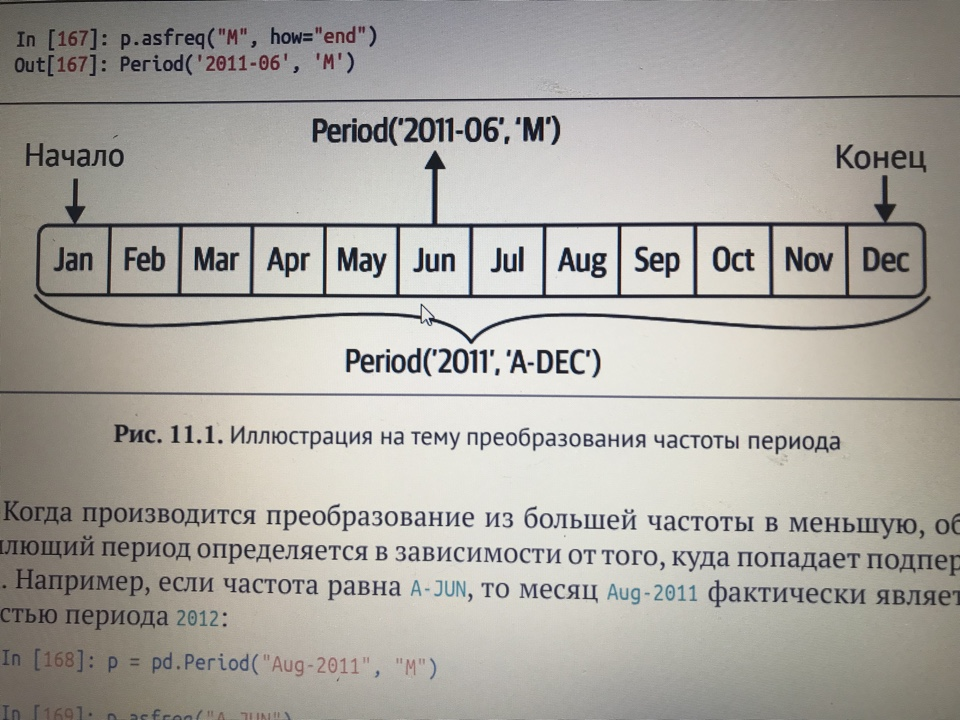

In [193]:
p = pd.Period("2011", freq="A-JUN")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3595438442.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p = pd.Period("2011", freq="A-JUN")


In [194]:
p

Period('2011', 'Y-JUN')

In [195]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [196]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

Когда производится преобразование из большей частоты в меньшую, 
объемлющий период определяется в зависимости от того, куда попадает подпериод. 
Например, если частота равна A-JUN, то месяц Aug-2011 фактически является 
частью периода 2012:

In [197]:
p = pd.Period("Aug-2011", "M")

In [198]:
p.asfreq("A-JUN")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1565973874.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq("A-JUN")


Period('2012', 'Y-JUN')

Эта семантика сохраняется и  в случае преобразования целых объектов 
PeriodIndex или временных рядов:

In [199]:
periods = pd.period_range("2006", "2009", freq="A-DEC")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3066967862.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  periods = pd.period_range("2006", "2009", freq="A-DEC")


In [200]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)

In [201]:
ts

2006    1.369847
2007   -1.608637
2008    0.041864
2009    0.593419
Freq: Y-DEC, dtype: float64

In [202]:
ts.asfreq("M", how="start")

2006-01    1.369847
2007-01   -1.608637
2008-01    0.041864
2009-01    0.593419
Freq: M, dtype: float64

Здесь каждый годичный период заменен месячным, соответствующим первому попадающему в него месяцу. 
Если бы мы вместо этого захотели получить 
последний рабочий день каждого года, то должны были бы задать частоту 'B'
и указать, что нам нужен конец периода:

In [203]:
ts.asfreq("B", how="end")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29    1.369847
2007-12-31   -1.608637
2008-12-31    0.041864
2009-12-31    0.593419
Freq: B, dtype: float64

### Квартальная частота периода

Квартальные данные стандартно применяются в бухгалтерии, финансах и других 
областях. Обычно квартальные итоги подводятся относительно конца финансового года, 
каковым считается последний календарный или рабочий день одного из 
12 месяцев. Следовательно, период 2012Q4 интерпретируется по-разному в зависимости от того, 
что понимать под концом финансового года. Библиотека pandas 
поддерживает все 12 возможных значений квартальной частоты от Q-JAN до Q-DEC:

In [204]:
p = pd.Period("2012Q4", freq="Q-JAN")

In [205]:
p

Period('2012Q4', 'Q-JAN')

Если финансовый год заканчивается в январе, то период 2012Q4 охватывает 
месяцы с ноября 2011 по январь 2012 года, и это легко проверить, преобразовав квартальную частоту в суточную.

In [206]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [207]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

Таким образом, арифметические операции с периодами выполняются очень 
просто; например, чтобы получить временную метку для момента 
«4 часа пополудни предпоследнего рабочего дня квартала», можно было бы написать:

In [208]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\2204560885.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\2204560885.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


In [209]:
p4pm

Period('2012-01-30 16:00', 'min')

In [210]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

Метод to_timestamp по умолчанию возвращает объект Timestamp, соответствующий началу периода.
Для генерирования квартальных диапазонов применяется функция pandas.
period_range. Арифметические операции такие же:

In [211]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

In [212]:
ts = pd.Series(np.arange(len(periods)), index=periods)

In [213]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [214]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3213338784.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3213338784.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


In [215]:
ts.index = new_periods.to_timestamp()

In [216]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Преобразование временных меток в периоды и обратно

Объекты Series и DataFrame, индексированные временными метками, можно 
преобразовать в периоды методом to_period:

In [217]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1909817033.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M")


In [218]:
ts = pd.Series(np.random.standard_normal(3), index=dates)

In [219]:
ts

2000-01-31    0.748514
2000-02-29   -0.614279
2000-03-31    0.255575
Freq: ME, dtype: float64

In [220]:
pts = ts.to_period()

In [221]:
pts

2000-01    0.748514
2000-02   -0.614279
2000-03    0.255575
Freq: M, dtype: float64

Поскольку периоды всегда ссылаются на непересекающиеся временные 
промежутки, то временная метка может принадлежать только одному периоду 
данной частоты. Частота нового объекта PeriodIndex по умолчанию выводится 
из временных меток, но можно задать любую поддерживаемую частоту 
(большинство частот в табл. 11.4 поддерживаются). 
Наличие повторяющихся периодов в результате также не приводит ни к каким проблемам

In [222]:
dates = pd.date_range("2000-01-29", periods=6)

In [223]:
ts2 = pd.Series(np.random.standard_normal(6), index=dates)

In [224]:
ts2

2000-01-29   -0.978272
2000-01-30    0.676715
2000-01-31    0.801310
2000-02-01   -1.748257
2000-02-02   -0.546461
2000-02-03    0.608916
Freq: D, dtype: float64

In [225]:
ts2.to_period("M")

2000-01   -0.978272
2000-01    0.676715
2000-01    0.801310
2000-02   -1.748257
2000-02   -0.546461
2000-02    0.608916
Freq: M, dtype: float64

Для обратного преобразования во временные метки служит метод to_timestamp, 
который возвращает объект типа DatetimeIndex:

In [226]:
pts = ts2.to_period()

In [227]:
pts

2000-01-29   -0.978272
2000-01-30    0.676715
2000-01-31    0.801310
2000-02-01   -1.748257
2000-02-02   -0.546461
2000-02-03    0.608916
Freq: D, dtype: float64

In [228]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -0.978272
2000-01-30 23:59:59.999999999    0.676715
2000-01-31 23:59:59.999999999    0.801310
2000-02-01 23:59:59.999999999   -1.748257
2000-02-02 23:59:59.999999999   -0.546461
2000-02-03 23:59:59.999999999    0.608916
Freq: D, dtype: float64

### Создание PeriodIndex из массивов

В наборах данных с фиксированной частотой информация о промежутках времени 
иногда хранится в нескольких столбцах. Например, в следующем макроэкономическом 
наборе данных год и квартал находятся в разных столбцах:

In [229]:
data = pd.read_csv("data/macrodata.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/macrodata.csv'

In [230]:
data.head(5)

NameError: name 'data' is not defined

In [231]:
data["year"]

NameError: name 'data' is not defined

In [232]:
data["quarter"]

NameError: name 'data' is not defined

Передав эти массивы конструктору PeriodIndex вместе с частотой, мы сможем 
объединить их для построения индекса DataFrame:

In [233]:
 index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
 .....: freq="Q-DEC")

NameError: name 'data' is not defined

In [234]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [235]:
data.index = index

NameError: name 'data' is not defined

In [236]:
data["infl"]

NameError: name 'data' is not defined

# 17 lesson

# Lesson topic: Time series. Передискретизация и преобразование частоты

Под передискретизацией понимается процесс изменения частоты временного ряда. 
Агрегирование с переходом от высокой частоты к низкой называется 
понижающей передискретизацией, а переход от низкой частоты к более высокой – повышающей передискретизацией. 
Не  всякая передискретизация попадает в одну из этих категорий; например, 
преобразование частоты W-WED (еженедельно по средам) в W-FRI не повышает и не понижает частоту.
Все объекты pandas имеют метод resample, отвечающий за любые преобразования частоты. 
API метода resample примерно такой же, как у groupby; мы сначала вызываем resample для группировки данных, 
а затем обращаемся к функции агрегирования:

In [237]:
dates = pd.date_range("2000-01-01", periods=100)

In [238]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [239]:
ts

2000-01-01   -0.113950
2000-01-02    0.439744
2000-01-03    0.148916
2000-01-04    0.897467
2000-01-05   -0.472715
                ...   
2000-04-05   -1.595838
2000-04-06   -1.768816
2000-04-07    1.088306
2000-04-08    0.072043
2000-04-09   -1.591630
Freq: D, Length: 100, dtype: float64

In [240]:
ts.resample("M").mean()

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31   -0.187431
2000-02-29   -0.323184
2000-03-31   -0.024544
2000-04-30   -0.486098
Freq: ME, dtype: float64

In [241]:
ts.resample("M", kind="period").mean()

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1563622178.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean()
C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1563622178.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean()


2000-01   -0.187431
2000-02   -0.323184
2000-03   -0.024544
2000-04   -0.486098
Freq: M, dtype: float64

Метод resample обладает большой гибкостью и  применим к  большим временным рядам. 
Примеры в следующих разделах иллюстрируют его семантику 
и использование, а в таблице ниже перечислены некоторые его аргументы.

##### Аргумент   Описание

##### • rule -Строка или объект DateOffset, задающий новую частоту, например 'M', 
'5min' или Second(15)

##### • axis -Ось передискретизации, по умолчанию 0

##### • fill_method -Способ интерполяции при повышающей передискретизации, например 
"ffill" или "bfill". По умолчанию интерполяция не производится

##### • closed -При понижающей передискретизации определяет, какой конец интервала 
должен включаться: "right" (правый) или "left" (левый)

##### • label -При понижающей передискретизации определяет, следует ли помечать 
агрегированный результат меткой правого или левого конца интервала. 
Например, пятиминутный интервал от 9:30 до 9:35 можно пометить меткой 
9:30 или 9:35. По умолчанию "right" (т. е. 9:35 в этом примере)

##### • limit -При прямом или обратном восполнении максимальное количество восполняемых периодов

##### • kind -Агрегировать в периоды ("period") или временные метки ("timestamp"); по умолчанию определяется видом индекса, связанного с данным временным рядом

##### • convention -При передискретизации периодов соглашение ("start" или "end") 
о преобразовании периода низкой частоты в период высокой частоты. 
По умолчанию "start"

##### • origin -«Базовая» временная метка, от которой отсчитываются границы интервала передискретизации; может также принимать значения "epoch", "start", 
"start_day", "end", "end_day"; полное описание см. в строке документации 
для resample

##### • offset -Смещение (объект timedelta), прибавляемое к начальному моменту; по 
умолчанию None

### Понижающая передискретизация

Понижающей передискретизацией называется агрегирование данных с целью 
понижения и  регуляризации частоты. Агрегируемые данные необязательно 
исправлять часто; желаемая частота определяет границы интервалов, разбивающих агрегируемые данные на порции. 
Например, для преобразования к месячному периоду, "M" или "BM", данные нужно разбить 
на интервалы продолжительностью один месяц. Говорят, что каждый интервал полуоткрыт; любая 
точка может принадлежать только одному интервалу, а их объединение должно покрывать всю протяженность временного ряда. 
Перед тем как выполнять понижающую передискретизацию данных методом resample, нужно решить для 
себя следующие вопросы:
• какой конец интервала будет включаться;
• помечать ли агрегированный интервал меткой его начала или конца.
Для иллюстрации рассмотрим данные с частотой одна минута:

In [242]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1110584800.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T")


In [243]:
ts = pd.Series(np.arange(len(dates)), index=dates)

In [244]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

Пусть требуется агрегировать данные в пятиминутные группы, или столбики, вычислив сумму по каждой группе

In [245]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

Переданная частота определяет границы интервалов с пятиминутным приращением. 
Для этой частоты левый конец интервала по умолчанию включается, 
т. е. значение 00:00 включается в интервал от 00:00 до 00:05, а значение 00:05
исключается. Если задать параметр closed='right', то будет включаться правый 
конец интервала:

In [246]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

Результирующий временной ряд помечен временными метками, соответствующими левым концам интервалов. 
Параметр label='right' позволяет использовать для этой цели метки правых концов:

In [253]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     4
2000-01-01 00:05:00    27
2000-01-01 00:10:00    24
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

### Передискретизация OHLC

##### График OHLC (для обозначения открытия, максимума, минимума и закрытия) - 
##### это стиль финансового графика, описывающий значения открытия, максимума, минимума и закрытия 
##### для заданной координаты x (наиболее вероятное время).

В финансовых приложениях очень часто временной ряд агрегируют, 
вычисляя четыре значения для каждого интервала: первое (открытие – open), 
последнее (закрытие – close), максимальное (high) и минимальное (low). Задав 
параметр how='ohlc', мы получим объект DataFrame, в столбцах которого находятся эти четыре агрегата, 
которые эффективно вычисляются одним вызовом функции:

In [254]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

In [255]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,10,10,0,3
2000-01-01 00:05:00,11,11,1,2
2000-01-01 00:10:00,9,9,8,8


### Повышающая передискретизация и интерполяция

Повышающая передискретизация  – это преобразование от низкой частоты 
к  более высокой, агрегирование при этом не  требуется. Рассмотрим объект 
DataFrame, содержащий недельные данные:

In [256]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
 .....: index=pd.date_range("2000-01-01", periods=2,
 .....: freq="W-WED"),
 .....: columns=["Colorado", "Texas", "New York", "Ohio"])

In [257]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.391292,0.295507,1.241517,2.061189
2000-01-12,-0.363953,0.565696,0.760859,0.177183


Если мы используем с этими данными функцию агрегирования, то на каждую группу получается только одно значение, 
а отсутствующие значения приводят к лакунам. Чтобы перейти к более высокой частоте без агрегирования, 
применяется метод asfreq:

In [258]:
df_daily = frame.resample("D").asfreq()

In [259]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.391292,0.295507,1.241517,2.061189
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.363953,0.565696,0.760859,0.177183


Допустим, мы хотим восполнить значения для дней, отличных от среды. 
Для этого применимы те же способы восполнения или интерполяции, что в методах fillna и reindex:

In [260]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.391292,0.295507,1.241517,2.061189
2000-01-06,0.391292,0.295507,1.241517,2.061189
2000-01-07,0.391292,0.295507,1.241517,2.061189
2000-01-08,0.391292,0.295507,1.241517,2.061189
2000-01-09,0.391292,0.295507,1.241517,2.061189
2000-01-10,0.391292,0.295507,1.241517,2.061189
2000-01-11,0.391292,0.295507,1.241517,2.061189
2000-01-12,-0.363953,0.565696,0.760859,0.177183


Можно восполнить отсутствующие значения не во всех последующих периодах, а только в заданном числе

In [261]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.391292,0.295507,1.241517,2.061189
2000-01-06,0.391292,0.295507,1.241517,2.061189
2000-01-07,0.391292,0.295507,1.241517,2.061189
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.363953,0.565696,0.760859,0.177183


Важно отметить, что новый индекс дат может не совпадать со старым:

In [262]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.391292,0.295507,1.241517,2.061189
2000-01-13,-0.363953,0.565696,0.760859,0.177183


### Передискретизация периодов

Передискретизация данных, индексированных периодами, похожа на индексирование временными метками:

In [263]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
 .....: index=pd.period_range("1-2000", "12-2001",
 .....: freq="M"),
 .....: columns=["Colorado", "Texas", "New York", "Ohio"])

In [264]:
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.455454,0.884698,-0.563909,-0.036246
2000-02,0.285183,-1.618495,-2.008572,-1.390455
2000-03,-1.241063,1.983149,1.707360,0.364880
2000-04,0.462320,0.762185,0.686375,0.158212
2000-05,0.097507,1.240033,0.455758,-0.433719


In [265]:
annual_frame = frame.resample("A-DEC").mean()

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\468843495.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample("A-DEC").mean()
C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\468843495.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("A-DEC").mean()


In [266]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.023045,0.456577,0.050533,-0.036076
2001,0.023607,-0.126454,-0.179735,-0.132361


Повышающая передискретизация чуть сложнее, потому что необходимо 
принять решение о том, в какой конец промежутка времени для новой частоты 
помещать значения до передискретизации, как в случае метода asfreq. 
Аргумент convention по умолчанию равен "start", но можно задать и значение "end":

In [267]:
# Q-DEC: поквартально, год заканчивается в декабре
annual_frame.resample("Q-DEC").ffill()

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\2358763389.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.023045,0.456577,0.050533,-0.036076
2000Q2,0.023045,0.456577,0.050533,-0.036076
2000Q3,0.023045,0.456577,0.050533,-0.036076
2000Q4,0.023045,0.456577,0.050533,-0.036076
2001Q1,0.023607,-0.126454,-0.179735,-0.132361
2001Q2,0.023607,-0.126454,-0.179735,-0.132361
2001Q3,0.023607,-0.126454,-0.179735,-0.132361
2001Q4,0.023607,-0.126454,-0.179735,-0.132361


In [268]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1415943662.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
C:\Users\ivter\AppData\Local\Temp\ipykernel_5012\1415943662.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,0.023045,0.456577,0.050533,-0.036076
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.023607,-0.126454,-0.179735,-0.132361


Поскольку периоды ссылаются на промежутки времени, правила повышающей и понижающей передискретизаций более строгие:

• в случае понижающей передискретизации конечная частота должна 
быть подпериодом начальной;

•  в случае повышающей передискретизации конечная частота должна 
быть надпериодом начальной.

Если эти правила не выполнены, то будет возбуждено исключение. 

### Групповая передискретизация по времени

Для временных рядов метод resample семантически является групповой операцией, основанной на разбиении времени на интервалы. 
Рассмотрим пример таблицы:

In [269]:
N = 15

In [270]:
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

In [271]:
df = pd.DataFrame({"time": times,
 .....: "value": np.arange(N)})

In [272]:
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


Здесь мы можем индексировать по столбцу "time", а затем выполнить передискретизацию:

In [273]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


Предположим, что объект DataFrame включает несколько временных рядов, которые различаются по дополнительному столбцу, 
содержащему групповой ключ:

In [274]:
df2 = pd.DataFrame({"time": times.repeat(3),
 .....: "key": np.tile(["a", "b", "c"], N),
 .....: "value": np.arange(N * 3.)})

In [275]:
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


Чтобы выполнить одну и ту же передискретизацию для каждого значения "key", введем объект pandas.Grouper:

In [276]:
time_key = pd.Grouper(freq="5min")

Затем можно задать индекс по времени, сгруппировать по "key" и  time_key и агрегировать:

In [277]:
resampled = (df2.set_index("time")
 .....: .groupby(["key", time_key])
 .....: .sum())

In [278]:
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [279]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


У pandas.Grouper есть ограничение – индекс Series или DataFrame должен быть построен по времени.

# 18 lesson

# Lesson topic: Time series. Скользящие оконные функции

Важный класс преобразований массива, применяемый для операций с  временными рядами, – статистические и иные функции, 

вычисляемые в скользящем окне или с экспоненциально убывающими весами. Я называю их скользящими оконными функциями, 

хотя сюда относятся также функции, не  связанные с  окном постоянной ширины, например экспоненциально взвешенное 

скользящее среднее. Как и во всех статистических функциях, отсутствующие значения автоматически отбрасываются.

Для начала загрузим временной ряд и передискретизируем его на частоту «рабочий день»:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [280]:
close_px_all = pd.read_csv("stock_px.csv",
 .....: parse_dates=True, index_col=0)

In [281]:
 close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

In [282]:
close_px = close_px.resample("B").ffill()

Теперь я  введу в  рассмотрение оператор rolling, который ведет себя как 

resample и groupby. Его можно применить к объекту Series или DataFrame, передав

аргумент window (равный количеству периодов; созданный график показан на рис.):

<Axes: >

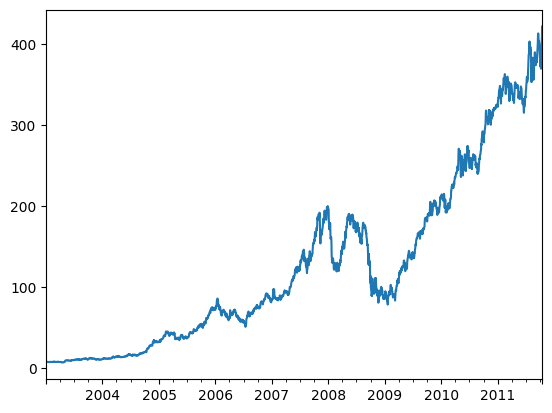

In [283]:
close_px["AAPL"].plot()

<Axes: >

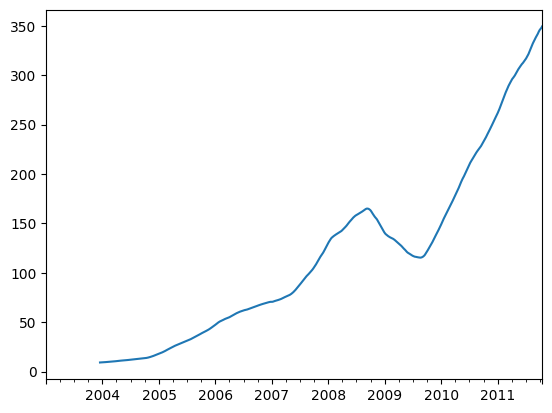

In [284]:
close_px["AAPL"].rolling(250).mean().plot()    # Скользящее среднее котировок акций Apple за 250 дней

Выражение rolling(250) ведет себя как groupby, но вместо группировки создает объект, 

который допускает группировку по скользящему окну шириной 

250 дней. Таким образом, здесь мы имеем средние котировки акций Apple в скользящем окне шириной 250 дней.

По умолчанию функции создания скользящих окон требуют, чтобы все значения в  окне были отличны от NA. 

Это поведение можно изменить, чтобы учесть возможность отсутствия данных и, в частности, тот факт, 

что в начале временного ряда количество периодов данных меньше window (см. рис.):

In [285]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [286]:
 std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

In [287]:
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

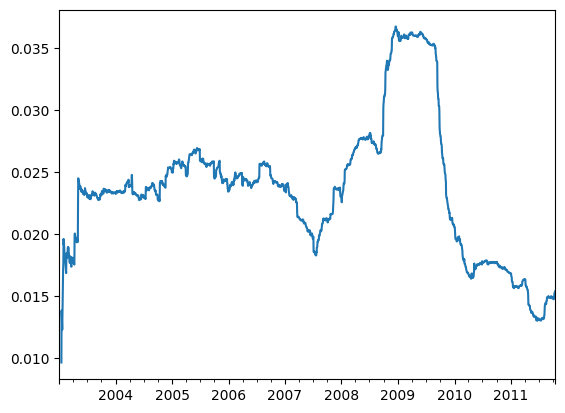

In [288]:
std250.plot()

Чтобы вычислить среднее с  расширяющимся окном, используйте оператор 

expanding вместо rolling. В этом случае начальное окно расположено в начале 

временного ряда и увеличивается в размере, пока не охватит весь ряд. 

Среднее с расширяющимся окном для временного ряда std250 вычисляется следующим образом:

In [289]:
expanding_mean = std250.expanding().mean()

При вызове функции скользящего окна от имени объекта DataFrame преобразование 

применяется к каждому столбцу (см. рис.)

In [290]:
plt.style.use('grayscale')

<Axes: >

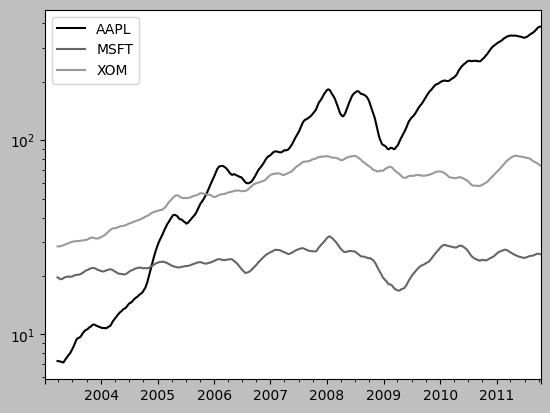

In [291]:
close_px.rolling(60).mean().plot(logy=True)  # Скользящее среднее котировок акций за 60 дней (по оси y отложен логарифм)

Функция rolling принимает также строку, содержащую фиксированное 

временное смещение, а не количество периодов. Такой вариант может быть 

полезен для нерегулярных временных рядов. Точно такие же строки передаются resample. 

Например, вот как можно было бы вычислить скользящее среднее за 20 дней:

In [292]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Экспоненциально взвешенные функции

Вместо использования окна постоянного размера, когда веса всех наблюдений одинаковы, 
можно задать постоянный коэффициент затухания, чтобы 
повысить вес последних наблюдений. Есть два способа задать коэффициент затухания, 
самый популярный – использовать промежуток (span), потому что результаты в этом случае получаются сравнимыми с применением
простой скользящей оконной функции, для которой размер окна равен промежутку.
Поскольку экспоненциально взвешенная статистика придает больший вес 
недавним наблюдениям, она быстрее «адаптируется» к изменениям по сравнению с вариантом с равными весами.
В pandas имеется оператор ewm (exponentially weighted moving – экспоненциально взвешенный сдвиг), который работает совместно с rolling и expanding. 
В примере ниже скользящее среднее котировок акций Apple за 60 дней сравнивается с экспоненциально взвешенным (EW) скользящим средним для span=60
(рис. 11.7):


In [293]:
aapl_px = close_px["AAPL"]["2006":"2007"]

In [294]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()

In [295]:
ewma30 = aapl_px.ewm(span=30).mean()

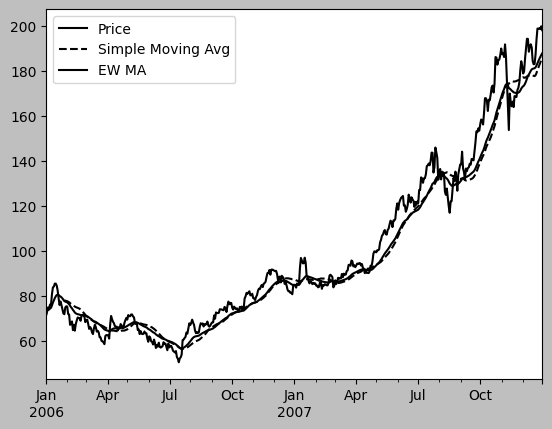

In [296]:
aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend()

# 19 lesson

# Lesson topic: Time series. Бинарные скользящие оконные функции

Для некоторых статистических операций, в частности корреляции и ковариации, 
необходимы два временных ряда. Например, финансовых аналитиков 
часто интересует корреляция цены акции с  основным биржевым индексом 
типа S&P 500. Чтобы найти эту величину, мы сначала вычислим относительные изменения в процентах для всего нашего временного ряда:

In [297]:
spx_px = close_px_all["SPX"]

In [298]:
spx_rets = spx_px.pct_change()

In [299]:
returns = close_px.pct_change()

Если теперь вызвать rolling, а за ней функцию агрегирования corr, 
то мы сможем вычислить скользящую корреляцию с spx_rets (получающийся график показан на рис. 11.8):

In [300]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)

<Axes: >

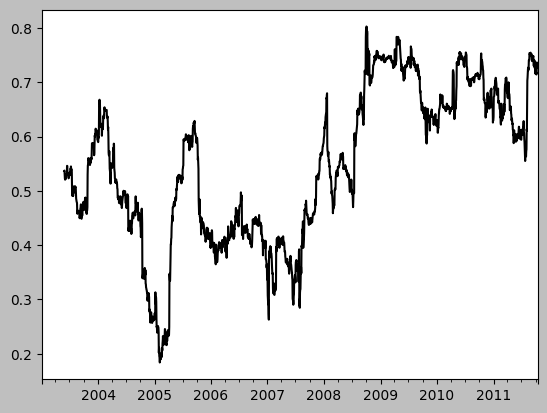

In [301]:
corr.plot()

Пусть требуется вычислить корреляцию индекса S&P 500 сразу с несколькими акциями. 
Можно было бы написать цикл, в  котором она вычисляется 
для каждой акции, как было сделано для Apple выше, но если каждая акция 
представлена столбцом в одном объекте DataFrame, то можно вычислить все 
корреляции за один прием, вызвав от имени DataFrame метод rolling и передав 
ему временной ряд spx_rets.
Результат показан на рис. 11.9.

In [302]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<Axes: >

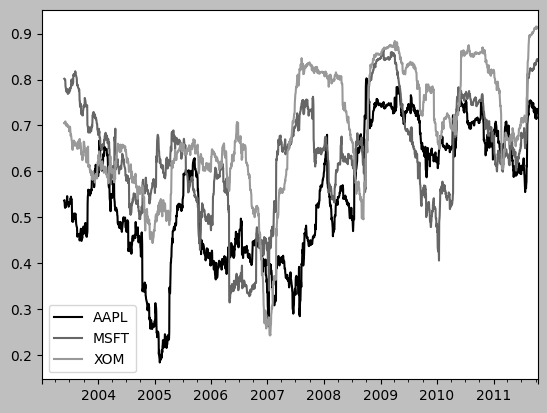

In [303]:
corr.plot()

### Скользящие оконные функции, определенные пользователем

Метод apply скользящего окна rolling и других подобных объектов позволяет 
применить произвольную функцию, принимающую массив, к  скользящему 
окну. Единственное требование заключается в том, что функция должна порождать 
только одно скалярное значение (производить редукцию) для каждого фрагмента массива. 
Например, при вычислении выборочных квантилей 
с помощью rolling(...).quantile(q) нам может быть интересен процентильный 
ранг некоторого значения относительно выборки. Это можно сделать с помощью 
функции scipy.stats.percentileofscore (график показан на рис. 11.10):

In [304]:
from scipy.stats import percentileofscore

In [ ]:
 def score_at_2percent(x):
     .....: 
     return percentileofscore(x, 0.02)

In [ ]:
result = returns["AAPL"].rolling(250).apply(score_at_2percent)

In [ ]:
result.plot()

Установить SciPy можно с помощью conda или pip:
pip install scipy

Что можно добавить к сказанному и рассмотренному материалу по библиотеке pandas?

Вопросы могут быть и обязательно будут у Вас. И это нормально.

В этом случае можно посоветовать:

● Обращаться к официальной технической документации библиотеки Numpy (http://www.pandas.org)

● Задавать вопросы на ресурсе https://stackoverflow.com/

● Гуглить и находить ответы на все интересующие вопросы.

###### На этом мы заканчиваем знакомство с основами библиотеки pandas.

### Рекомендуемая литература:

1.Уэс Маккини. Python и анализ данных. М.: МК Пресс, 2023.

2.Джоэл Грас. Data science. Наука о данных с нуля. СПб.: БХВ-Петербурr, 2021. 

3.Дж.Вандер Плас. Python для сложных задач. Наука о данных и машинное обучение. СПб.: Питер, 2018.